# Importing Packages and API Setup

In [ ]:
# Only needs to be run upon first-time use
import sys
!{sys.executable} -m pip install alpha_vantage

In [125]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime as dt
# https://github.com/RomelTorres/alpha_vantage
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators 
from alpha_vantage.sectorperformance import SectorPerformances

In [126]:
API_URL = 'https://www.alphavantage.co/query?'
API_KEY = 'TMANNBF5NO707ZEI'

In [127]:
# Output formats: json dictionaries (default), DataFrame, csv.
# csv does not support ForeignExchange, SectorPerformances, TechIndicators.
# indexing_type can also be integer (default: date)
ts = TimeSeries(key=API_KEY, output_format='pandas', indexing_type='date')
ti = TechIndicators(key=API_KEY, output_format='pandas')
sp = SectorPerformances(key=API_KEY, output_format='pandas')

# Data Collection

In [134]:
# List to keep all stocks of interest
port = {}
port_rets = {}

def add_to_port(symbol, stock_data):
    port[symbol] = stock_data

In [135]:
# symbols = list of stock tickers as strings
# intraday_interval: '1min', '5min', '15min', '30min', '60min' (default '15min')
def get_data(symbol, start_date= None, end_date= None, int_type='daily_adjusted', intra_int='15min'):

    if int_type is 'daily_adjusted':
        data, meta = ts.get_daily_adjusted(symbol, outputsize='full')
    elif int_type is 'daily':
        data, meta = ts.get_daily(symbol, outputsize='full')
    elif int_type is 'intraday':
        data, meta = ts.get_intraday(symbol, interval=intra_int, outputsize='full')
    elif int_type is 'weekly':
        data, meta = ts.get_weekly(symbol)
    elif int_type is 'weekly_adjusted':
        data, meta = ts.get_weekly_adjusted(symbol)
    elif int_type is 'monthly':
        data, meta = ts.get_monthly(symbol)
    elif int_type is 'monthly_adjusted':
        ts.get_monthly_adjusted(symbol)   

    data.rename(columns=lambda col: col[3:], inplace=True)
    
    if start_date and end_date:
        data = data.loc[start_date:end_date]
    elif start_date:
        data = data.loc[start_date:]
    else:
        data = data.loc[:end_date]
    
    df_stock = pd.DataFrame(data)
    df_stock.index = pd.to_datetime(df_stock.index)
    
    add_to_port(symbol, df_stock)
    
    return pd.DataFrame(df_stock)

In [165]:
def calculate_returns(portfolio):
    
    for symb, data in portfolio.items():
        
        daily_close = data['close']
        daily_pct_change = daily_close.pct_change()
        daily_pct_change.fillna(0, inplace=True)

        daily_log_returns = np.log(daily_close.pct_change()+1)
        daily_log_returns.fillna(0, inplace=True)
    
        # Cumulative daily rate of return is useful to determine the value of an investment at regular intervals.
        cum_daily_return = (1 + daily_pct_change).cumprod()
        port_rets[symb] = pd.DataFrame({'pct change': daily_pct_change,
                        'log returns':daily_log_returns,
                        'cumulative daily':cum_daily_return})
    return port_rets

calculate_returns(port)

{'COMM':             pct change  log returns  cumulative daily
 date                                                 
 2018-04-03    0.000000     0.000000          1.000000
 2018-04-04    0.004565     0.004555          1.004565
 2018-04-05    0.004544     0.004534          1.009130
 2018-04-06   -0.021613    -0.021850          0.987319
 2018-04-09   -0.002055    -0.002057          0.985290
 2018-04-10    0.013385     0.013296          0.998478
 2018-04-11    0.006858     0.006835          1.005326
 2018-04-12    0.034813     0.034221          1.040325
 2018-04-13   -0.014993    -0.015106          1.024727
 2018-04-16    0.003589     0.003582          1.028405
 2018-04-17    0.000740     0.000740          1.029166
 2018-04-18    0.011336     0.011272          1.040832
 2018-04-19   -0.008772    -0.008811          1.031702
 2018-04-20    0.004425     0.004415          1.036267
 2018-04-23   -0.008321    -0.008356          1.027644
 2018-04-24    0.000740     0.000740          1.028405
 2

# Construct the Portfolio and Timeframe

In [166]:
# Enter start date
start = '2018-04-03'

# Default set to today
end = dt.today().strftime('%Y-%m-%d')

comm = get_data('COMM', start, end)
pags = get_data('PAGS', start, end)
qqq = get_data('QQQ', start, end)

# Plotting

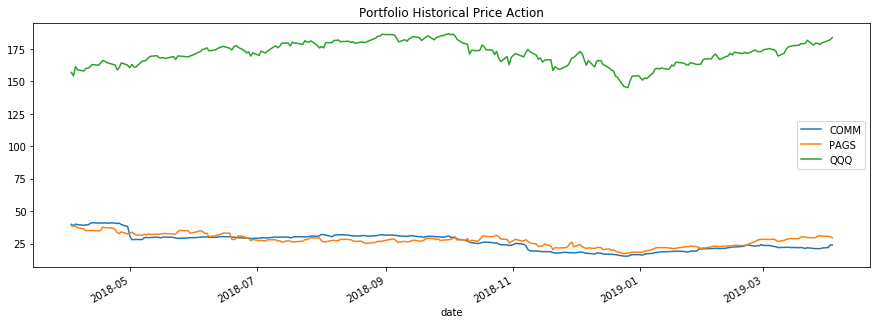

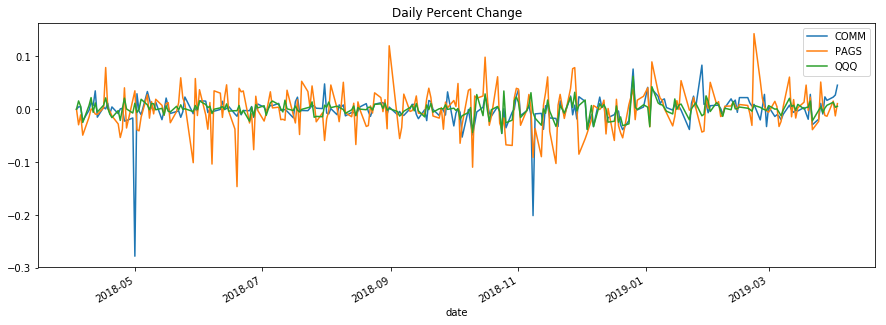

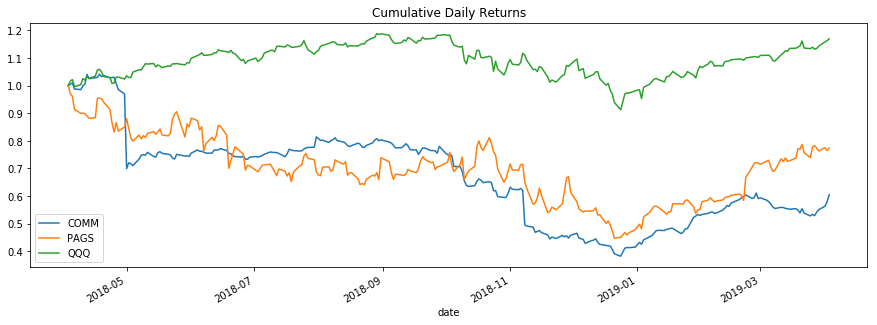

In [161]:
# Plot price action
for sym, data in port.items():
    data['open'].plot(figsize=(15,5), label=sym,legend=True)
plt.title('Portfolio Historical Price Action')
plt.show()

# Plot daily pct change
for sym, data in port_rets.items():
    data['pct change'].plot(figsize=(15,5), label=sym,legend=True)
plt.title('Daily Percent Change')
plt.show()

# Plot cumulative returns
for sym, data in port_rets.items():
    data['cumulative daily'].plot(figsize=(15,5), label=sym,legend=True)
plt.title('Cumulative Daily Returns')
plt.show()

# Statistical Measurements - not updated

In [167]:
# Finds the covariance matrix of the stocks within the portfolio.
# Uses closing price
def port_spearmanr(portfolio):
    
    for symbol, data in port.items():
        close = np.array(data['close'])
    return var

In [169]:
stats.spearmanr(port['QQQ']['close'], port['COMM']['close'])

SpearmanrResult(correlation=0.4579034565184813, pvalue=1.6189286069483384e-14)

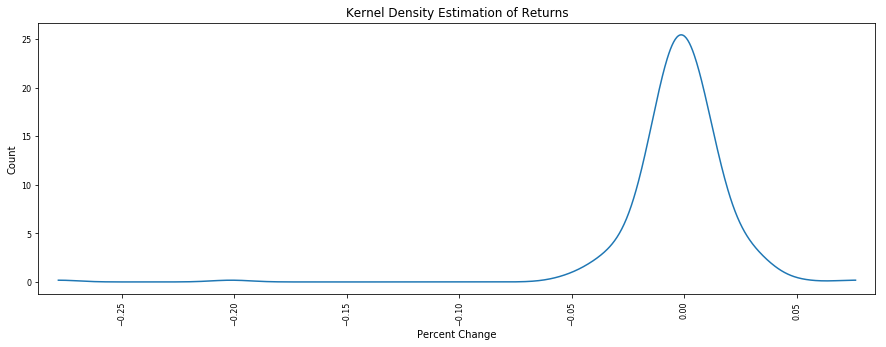

In [48]:
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', figsize=(15,5))
plt.title('Kernel Density Estimation of Returns')
plt.xlabel('Percent Change')
plt.ylabel('Count')
plt.show()

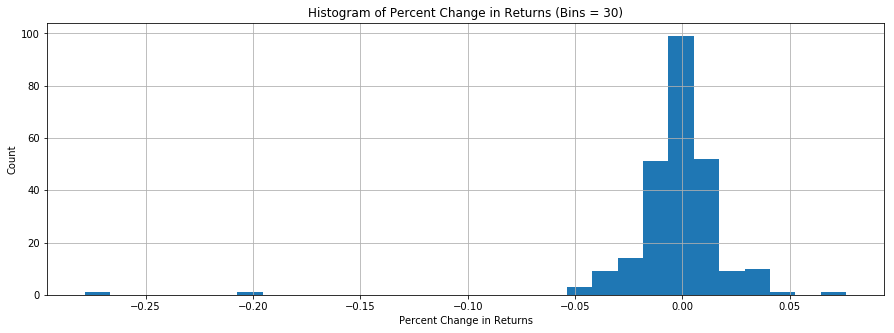

,pct change
count,251.000000
mean,-0.002959
std,0.026838
min,-0.278127
25%,-0.009878
50%,-0.001658
75%,0.007077
max,0.076159


In [52]:
bins = 30
daily_pct_change.hist(bins=bins, figsize=(15,5))
plt.title(f'Histogram of Percent Change in Returns (Bins = {bins})')
plt.xlabel('Percent Change in Returns')
plt.ylabel('Count')
plt.show()
daily_pct_change.describe()

In [50]:
min_periods = 25
vol = daily_pct_change['pct change'].rolling(min_periods).std()*np.sqrt(min_periods)

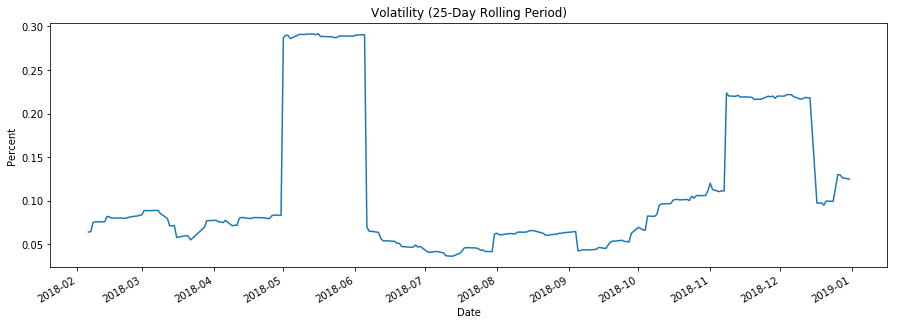

count    227.000000
mean       0.111115
std        0.080280
min        0.036518
25%        0.060239
50%        0.079779
75%        0.111477
max        0.291652
Name: pct change, dtype: float64


In [51]:
vol.plot(figsize=(15,5))
plt.title(f'Volatility ({min_periods}-Day Rolling Period)')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.show()
print(vol.describe())